In [1]:
!pip install tensorflow==2.17.0 opencv-python mediapipe scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [2]:
pip install --upgrade protobuf tensorflow

Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-5.28.0-cp310-abi3-win_amd64.whl.metadata (592 bytes)
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install --upgrade tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic=mp.solutions.holistic
mp_drawing=mp.solutions.drawing_utils


In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
 
def draw_landmarks(image,results):
    mp_drawing .draw_landmarks(image,results.face_landmarks,mp_holistic.FACEMESH_TESSELATION)
    mp_drawing .draw_landmarks(image,results.pose_landmarks,mp_holistic.POSE_CONNECTIONS)
    mp_drawing .draw_landmarks(image,results.left_hand_landmarks,mp_holistic.HAND_CONNECTIONS)
    mp_drawing .draw_landmarks(image,results.right_hand_landmarks,mp_holistic.HAND_CONNECTIONS)

mp_holistic.POSE_CONNECTIONS

frozenset({(0, 1),
           (0, 4),
           (1, 2),
           (2, 3),
           (3, 7),
           (4, 5),
           (5, 6),
           (6, 8),
           (9, 10),
           (11, 12),
           (11, 13),
           (11, 23),
           (12, 14),
           (12, 24),
           (13, 15),
           (14, 16),
           (15, 17),
           (15, 19),
           (15, 21),
           (16, 18),
           (16, 20),
           (16, 22),
           (17, 19),
           (18, 20),
           (23, 24),
           (23, 25),
           (24, 26),
           (25, 27),
           (26, 28),
           (27, 29),
           (27, 31),
           (28, 30),
           (28, 32),
           (29, 31),
           (30, 32)})

In [13]:
def draw_styled_landmarks(image,results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION,
                        mp_drawing.DrawingSpec(color=(80, 110, 10), thickness=1, circle_radius=1),
                        mp_drawing.DrawingSpec(color=(80,256,121), thickness=1,circle_radius=1)
                        )

    # Draw pose landmarks
    
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                        mp_drawing.DrawingSpec(color=(80, 22, 10), thickness=2, circle_radius=4),
                        mp_drawing.DrawingSpec(color=(80,44,121), thickness=2,circle_radius=2))

    # Draw left hand landmarks
    
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                        mp_drawing.DrawingSpec(color=(245,117,65), thickness=2, circle_radius=4),
                        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2,circle_radius=2))

    # Draw right hand landmarks
   
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                        mp_drawing.DrawingSpec(color=(245,117,65), thickness=2, circle_radius=4),
                        mp_drawing.DrawingSpec(color=(245,66,230), thickness=2,circle_radius=2))

In [14]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module='google.protobuf')
cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.4, min_tracking_confidence=0.4) as holistic:
    while cap.isOpened():
        ret, frame = cap.read()
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        draw_styled_landmarks(image, results)
        cv2.imshow('OpenCV Feed', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [11]:
cap.release()
cv2.destroyAllWindows()

In [15]:
results.left_hand_landmarks

In [16]:
frame

array([[[129, 161, 136],
        [128, 160, 135],
        [126, 158, 133],
        ...,
        [ 27,  20,  48],
        [ 29,  26,  42],
        [107, 106, 116]],

       [[129, 161, 136],
        [128, 160, 135],
        [127, 159, 134],
        ...,
        [ 26,  19,  46],
        [ 26,  23,  38],
        [105, 104, 113]],

       [[128, 160, 135],
        [128, 160, 135],
        [127, 159, 134],
        ...,
        [ 27,  21,  45],
        [ 24,  22,  35],
        [102, 102, 109]],

       ...,

       [[138, 161, 133],
        [139, 162, 134],
        [139, 162, 134],
        ...,
        [  8,   4,  63],
        [ 10,   6,  65],
        [ 12,   8,  67]],

       [[140, 163, 135],
        [140, 163, 135],
        [140, 163, 135],
        ...,
        [  8,   2,  61],
        [  9,   4,  63],
        [ 11,   6,  65]],

       [[140, 163, 135],
        [139, 162, 134],
        [139, 162, 134],
        ...,
        [  8,   2,  61],
        [  9,   3,  62],
        [ 10,   4,  63]]

In [17]:
draw_landmarks(frame,results)

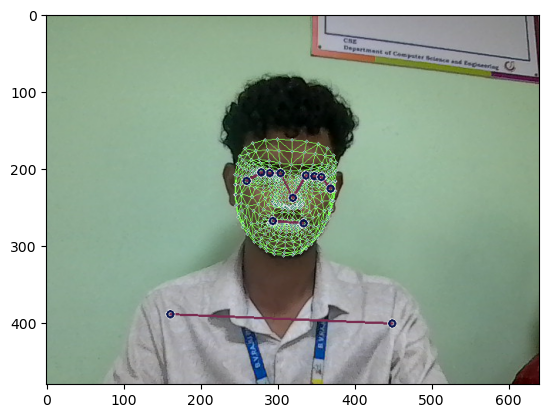

In [18]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [19]:
results.left_hand_landmarks

In [20]:
print(results.left_hand_landmarks)

None


In [21]:
pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [24]:
face

array([ 0.48982111,  0.55739129, -0.02160008, ...,  0.56365448,
        0.43966755,  0.01070216])

In [25]:
def extract_keypoints(results):
    pose=np.array([[res.x,res.y,res.z,res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
    face=np.array([[res.x,res.y,res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
    lh=np.array([[res.x,res.y,res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh=np.array([[res.x,res.y,res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose,face,lh,rh])

In [26]:
result_test=extract_keypoints(results)

In [27]:
result_test

array([ 0.50043553,  0.497805  , -1.05780768, ...,  0.        ,
        0.        ,  0.        ])

In [29]:
np.save('0',result_test)

In [30]:
np.load('0.npy')

array([ 0.50043553,  0.497805  , -1.05780768, ...,  0.        ,
        0.        ,  0.        ])

In [31]:
#pth for exported data, numypy arrays
DATA_PATH=os.path.join('MP_Data')

#actions that we try to detect
actions=np.array(['hello','thanks','iloveyou'])

#thirty video worth of data
no_sequences=5

#video are going to be 30 frames in length
sequence_length=5

In [32]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH,action,str(sequence)))
        except:
            pass
        

In [25]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()



In [26]:
cap.release()
cv2.destroyAllWindows()

In [27]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [28]:
label_map={label:num for num,label in enumerate(actions)}

In [29]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [30]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [31]:
np.array(sequences).shape

(90, 30, 1662)

In [32]:
np.array(labels).shape

(90,)

In [33]:
X=np.array(sequences)

In [34]:
X.shape

(90, 30, 1662)

In [35]:
y=to_categorical(labels).astype(int)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [37]:
y_test.shape

(5, 3)

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Input
from tensorflow.keras.callbacks import TensorBoard

In [39]:
log_dir=os.path.join('Logs')
tb_callback=TensorBoard(log_dir=log_dir)

In [40]:
# Initialize the Sequential model
model = Sequential()

# Add Input layer explicitly
model.add(Input(shape=(30, 1662)))  # Explicit Input layer

# Add LSTM layers
model.add(LSTM(64, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))

# Add Dense layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

# Output layer: actions.shape[0] indicates the number of classes in your dataset
model.add(Dense(actions.shape[0], activation='softmax'))



In [41]:
res=[0.7,0.2,.01]

In [42]:
actions[np.argmax(res)]

'hello'

In [43]:
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['categorical_accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=1000,callbacks=[tb_callback])

Epoch 1/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - categorical_accuracy: 0.3464 - loss: 2.2405
Epoch 2/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - categorical_accuracy: 0.3444 - loss: 4.4039
Epoch 3/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.3503 - loss: 7.5376
Epoch 4/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - categorical_accuracy: 0.2702 - loss: 1.7744
Epoch 5/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.3523 - loss: 5.4784
Epoch 6/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - categorical_accuracy: 0.2778 - loss: 9.8331
Epoch 7/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - categorical_accuracy: 0.3464 - loss: 4.7174
Epoch 8/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - categorical_accuracy: 0.2799 - loss: 3.0107
Epoch 9/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - categorical_accuracy: 0.4011 - loss: 6.3518
Epoch 10/1000
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - categorical_accuracy: 0.3131 - loss: 2.8055
Epoch 11/1000
3/3 ━━━━━━━━━━━

In [ ]:
model.summary()

In [ ]:
res=model.predict(X_test)

In [ ]:
actions[np.argmax(res[4])]

In [ ]:
actions[np.argmax(y_test[4])]

In [ ]:
model.save('action.h5')

In [ ]:
del model

In [ ]:
model.load_weights('action.h5')

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat=model.predict(X_train)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
yhat

In [ ]:
print(f"Length of ytrue: {len(ytrue)}")
print(f"Length of yhat: {len(yhat)}")

In [ ]:
min_len = min(len(ytrue), len(yhat))
ytrue = ytrue[:min_len]
yhat = yhat[:min_len]


In [ ]:
from sklearn.metrics import multilabel_confusion_matrix
mcm = multilabel_confusion_matrix(ytrue, yhat)
print(mcm)


In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue,yhat)

In [ ]:
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    
    for num, prob in enumerate(res):
        # Debugging: Print the prob value and its type
        print(f"Probability {num}: {prob}, Type: {type(prob)}")
        
        # Ensure prob is a scalar by converting it to a float
        if isinstance(prob, (list, np.ndarray)):
            prob_value = float(prob[0])  # Extract the scalar if it's an array or list
        else:
            prob_value = float(prob)  # Convert directly if it's already a scalar
        
        # Debugging: Print prob_value to ensure it's a scalar
        print(f"Scalar Probability {num}: {prob_value}")
        
        # Ensure num is within bounds for colors and actions
        if num < len(colors) and num < len(actions):
            # Draw a rectangle visualizing the probability
            cv2.rectangle(output_frame, (0, 60 + num * 40), 
                          (int(prob_value * 100), 90 + num * 40), colors[num], -1)
            
            # Display the action name
            cv2.putText(output_frame, actions[num], (0, 85 + num * 40), 
                        cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        else:
            print(f"Index {num} is out of range for colors or actions.")
    
    return output_frame



In [ ]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors)) 

In [ ]:
sequence.reverse()

In [ ]:
len(sequence)

In [ ]:
sequence.append('def')

In [ ]:
sequence.reverse()

In [ ]:
sequence[-30:]

In [ ]:
sequence = []
sentence = []
threshold = 0.8

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.insert(0,keypoints)
        sequence = sequence[:30]
        # sequence.append(keypoints)
        # sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

In [ ]:
res[np.argmax(res)] > threshold

In [ ]:
(num_sequences,30,1662)

In [ ]:
model.predict(np.expand_dims(X_test[0], axis=0))